In [1]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import numpy as np
import statistics

In [2]:
lrSum = xw.Book(r'F:\UvA\F\UvA\app\hyperparameterTuning_modelSelection_LR_noFilterSummary.xlsx')
dtSum = xw.Book(r'F:\UvA\F\UvA\app\hyperparameterTuning_modelSelection_DT_noFilterSummary.xlsx')
rfSum = xw.Book(r'F:\UvA\F\UvA\app\hyperparameterTuning_modelSelection_RF_noFilterSummary.xlsx')
knnSum = xw.Book(r'F:\UvA\F\UvA\app\hyperparameterTuning_modelSelection_KNN_noFilterSummary.xlsx')

In [3]:
sheet_LR = lrSum.sheets("hyperparameterTuning_modelSelec").used_range.value
df_tuneLR = pd.DataFrame(sheet_LR)
sheet_DT = dtSum.sheets("hyperparameterTuning_modelSelec").used_range.value
df_tuneDT = pd.DataFrame(sheet_DT)
sheet_RF = rfSum.sheets("hyperparameterTuning_modelSelec").used_range.value
df_tuneRF = pd.DataFrame(sheet_RF)
sheet_KNN = knnSum.sheets("hyperparameterTuning_modelSelec").used_range.value
df_tuneKNN = pd.DataFrame(sheet_KNN)

In [8]:
df_tuneLR = df_tuneLR[df_tuneLR.columns[:30]]
df_tuneDT = df_tuneDT[df_tuneDT.columns[:30]]
df_tuneRF = df_tuneRF[df_tuneRF.columns[:31]]
df_tuneKNN = df_tuneKNN[df_tuneKNN.columns[:31]]

In [10]:
df_tuneLR = df_tuneLR.rename(columns=df_tuneLR.iloc[0]).drop(df_tuneLR.head(1).index)
df_tuneDT = df_tuneDT.rename(columns=df_tuneDT.iloc[0]).drop(df_tuneDT.head(1).index)
df_tuneRF = df_tuneRF.rename(columns=df_tuneRF.iloc[0]).drop(df_tuneRF.head(1).index)
df_tuneKNN = df_tuneKNN.rename(columns=df_tuneKNN.iloc[0]).drop(df_tuneKNN.head(1).index)

In [25]:
df_tuneLR_8para = df_tuneLR.loc[df_tuneLR["csv"] <= 2]
df_tuneLR_7para_noMONOISO = df_tuneLR.loc[df_tuneLR["csv"] == 3]
df_tuneLR_7para_noUsrRef = df_tuneLR.loc[df_tuneLR["csv"] == 4]

In [26]:
df_tuneDT_8para = df_tuneDT.loc[df_tuneDT["csv"] == 1]
df_tuneDT_7para_noUsrRef = df_tuneDT.loc[df_tuneDT["csv"] == 2]
df_tuneDT_4para_noUsrRef_noMatchDiff_noMS2ErrStd_noMONOISO = df_tuneDT.loc[df_tuneDT["csv"] == 3]

In [55]:
df_tuneRF_8para = df_tuneRF.loc[df_tuneRF["csv"] == 1]
df_tuneRF_7para_noUsrRef_1 = df_tuneRF.loc[df_tuneRF["csv"] == 2]
df_tuneRF_7para_noUsrRef_2 = df_tuneRF.loc[df_tuneRF["csv"] == 6]
df_tuneRF_7para_noUsrRef = pd.concat([df_tuneRF_7para_noUsrRef_1, df_tuneRF_7para_noUsrRef_2])
df_tuneRF_6para_noUsrRef_noMatchDiff = df_tuneRF.loc[df_tuneRF["csv"] == 3]
df_tuneRF_5para_noUsrRef_noMatchDiff_noMS2ErrStd = df_tuneRF.loc[df_tuneRF["csv"] == 4]
df_tuneRF_5para_noUsrRef_noMatchDiff_noMS2ErrStd_noMONOISO = df_tuneRF.loc[df_tuneRF["csv"] == 5]

In [61]:
df_tuneKNN_8para = df_tuneKNN.loc[df_tuneKNN["csv"] <= 9]
df_tuneKNN_7para_noUsrRef = df_tuneKNN.loc[df_tuneKNN["csv"] >= 10].loc[df_tuneKNN["csv"] <= 12]
df_tuneKNN_7para_noUsrRef_noDeltaRI = df_tuneKNN.loc[df_tuneKNN["csv"] == 13]
df_tuneKNN_6para_noUsrRef_noMatchDiff_1 = df_tuneKNN.loc[df_tuneKNN["csv"] == 14]
df_tuneKNN_6para_noUsrRef_noMatchDiff_2 = df_tuneKNN.loc[df_tuneKNN["csv"] == 16]
df_tuneKNN_6para_noUsrRef_noMatchDiff_3 = df_tuneKNN.loc[df_tuneKNN["csv"] == 18]
df_tuneKNN_6para_noUsrRef_noMatchDiff = pd.concat([df_tuneKNN_6para_noUsrRef_noMatchDiff_1, df_tuneKNN_6para_noUsrRef_noMatchDiff_2, df_tuneKNN_6para_noUsrRef_noMatchDiff_3])
df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI_1 = df_tuneKNN.loc[df_tuneKNN["csv"] == 15]
df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI_2 = df_tuneKNN.loc[df_tuneKNN["csv"] == 17]
df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI_3 = df_tuneKNN.loc[df_tuneKNN["csv"] == 19]
df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI = pd.concat([df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI_1, df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI_2, df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI_3])

In [68]:
len(df_tuneKNN_8para)

371

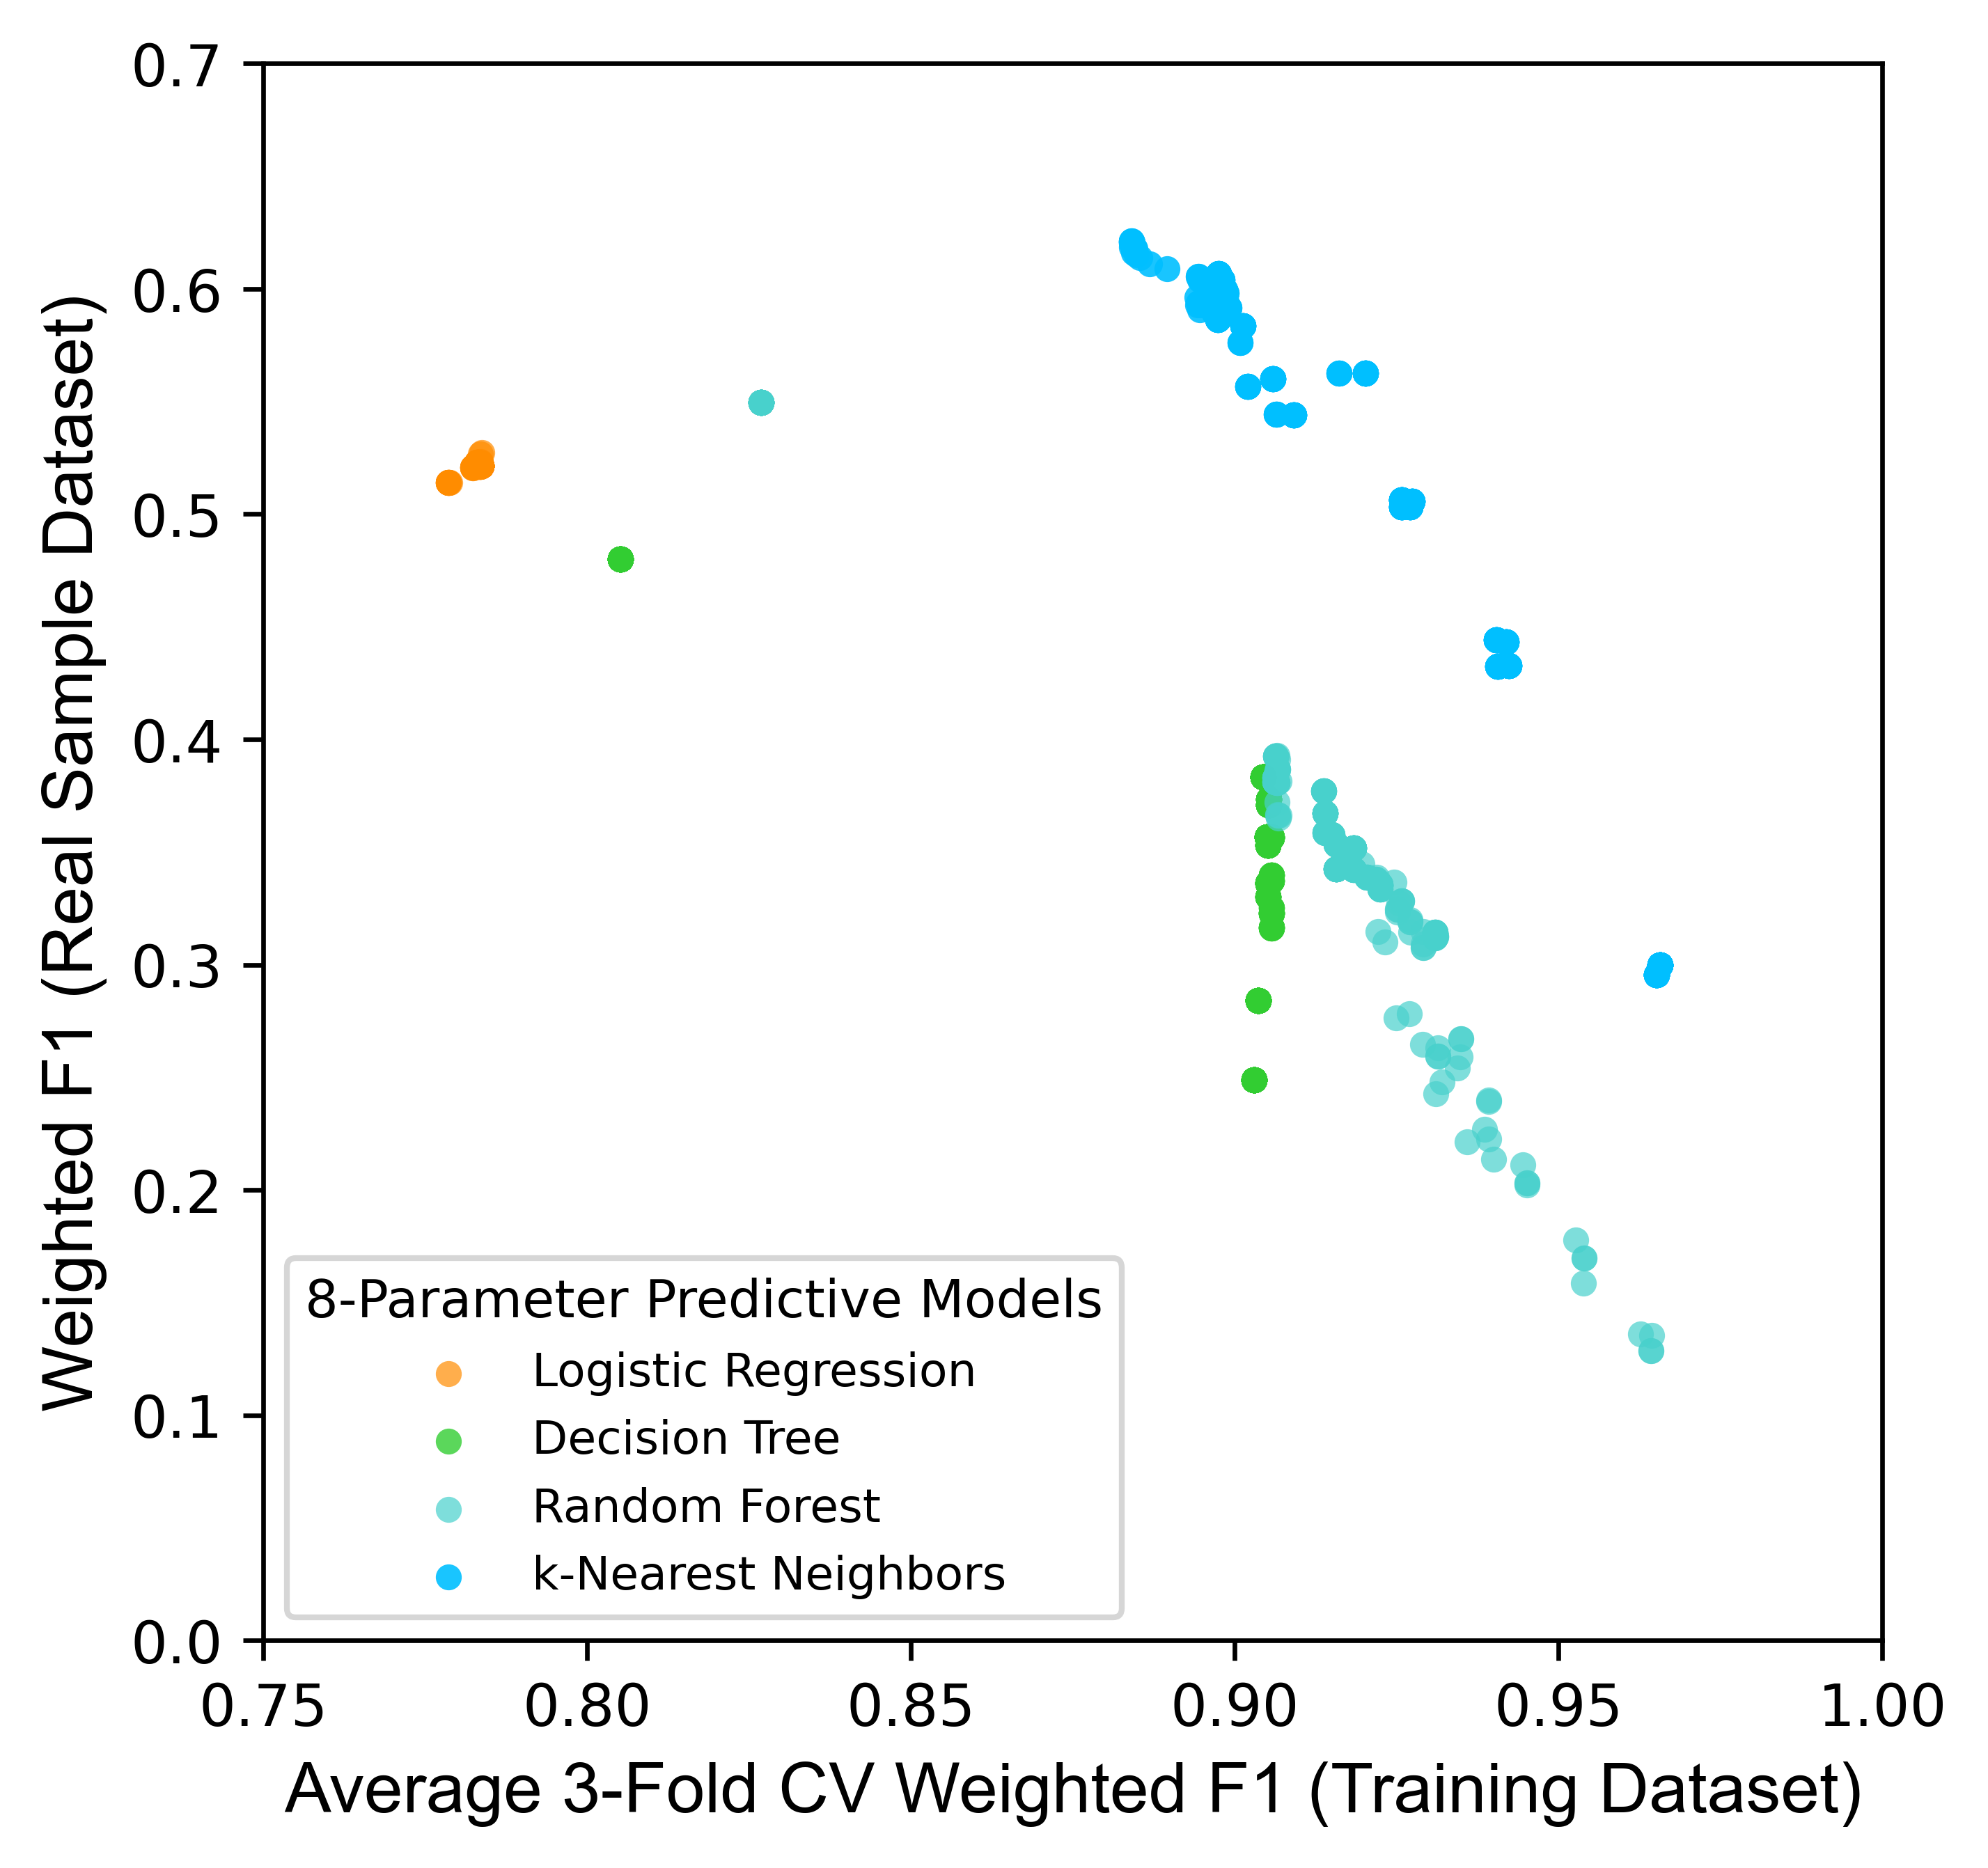

In [122]:
# All 8 parameters models
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 600

x1 = df_tuneLR_8para['f1_3Ftrain']
y1 = df_tuneLR_8para['f1_val']
z1 = df_tuneLR_8para['f1_pest']

x2 = df_tuneDT_8para['f1_3Ftrain']
y2 = df_tuneDT_8para['f1_val']
z2 = df_tuneDT_8para['f1_pest']

x3 = df_tuneRF_8para['f1_3Ftrain']
y3 = df_tuneRF_8para['f1_val']
z3 = df_tuneRF_8para['f1_pest']

x4 = df_tuneKNN_8para['f1_3Ftrain']
y4 = df_tuneKNN_8para['f1_val']
z4 = df_tuneKNN_8para['f1_pest']

(fig, ax) = plt.subplots()

c_dict1 = {"Logistic Regression": 'darkorange', "Logistic Regression": 'darkred'}
count_start = 0
count_end = 130
ax.scatter(x1[count_start:count_end], z1[count_start:count_end], s=20, label="Logistic Regression", c="darkorange", alpha=0.7, lw=0)


c_dict2 = {"Decision Tree": 'limegreen', "Decision Tree": 'darkgreen'}
count_start = 0
count_end = 729
ax.scatter(x2[count_start:count_end], z2[count_start:count_end], s=20, label="Decision Tree", c="limegreen", alpha=0.8, lw=0)


c_dict3 = {"Random Forest": 'mediumturquoise', "Random Forest": 'darkcyan'}
count_start = 0
count_end = 252
ax.scatter(x3[count_start:count_end], z3[count_start:count_end], s=20, label="Random Forest", c="mediumturquoise", alpha=0.7, lw=0)


c_dict4 = {"k-Nearest Neighbors": 'deepskyblue', "k-Nearest Neighbors": 'navy'}
count_start = 0
count_end = 371
ax.scatter(x4[count_start:count_end], z4[count_start:count_end], s=20, label="k-Nearest Neighbors", c="deepskyblue", alpha=0.9, lw=0)
    
    
plt.xlabel("Average 3-Fold CV Weighted F1 (Training Dataset)", fontproperties='Arial', fontsize=12)
plt.ylabel("Weighted F1 (Real Sample Dataset)", fontproperties='Arial', fontsize=12)

plt.xlim(0.75, 1.00)
plt.ylim(0, 0.70)

ax.legend(loc="lower left", title="8-Parameter Predictive Models", title_fontsize=9, fontsize=8)

#plt.show()
plt.savefig(r"F:\UvA\F\UvA\app\updated4pest_8para.jpg", bbox_inches='tight')
#plt.close()

In [126]:
len(df_tuneKNN_6para_noUsrRef_noMatchDiff)

31

In [127]:
len(df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI)

31

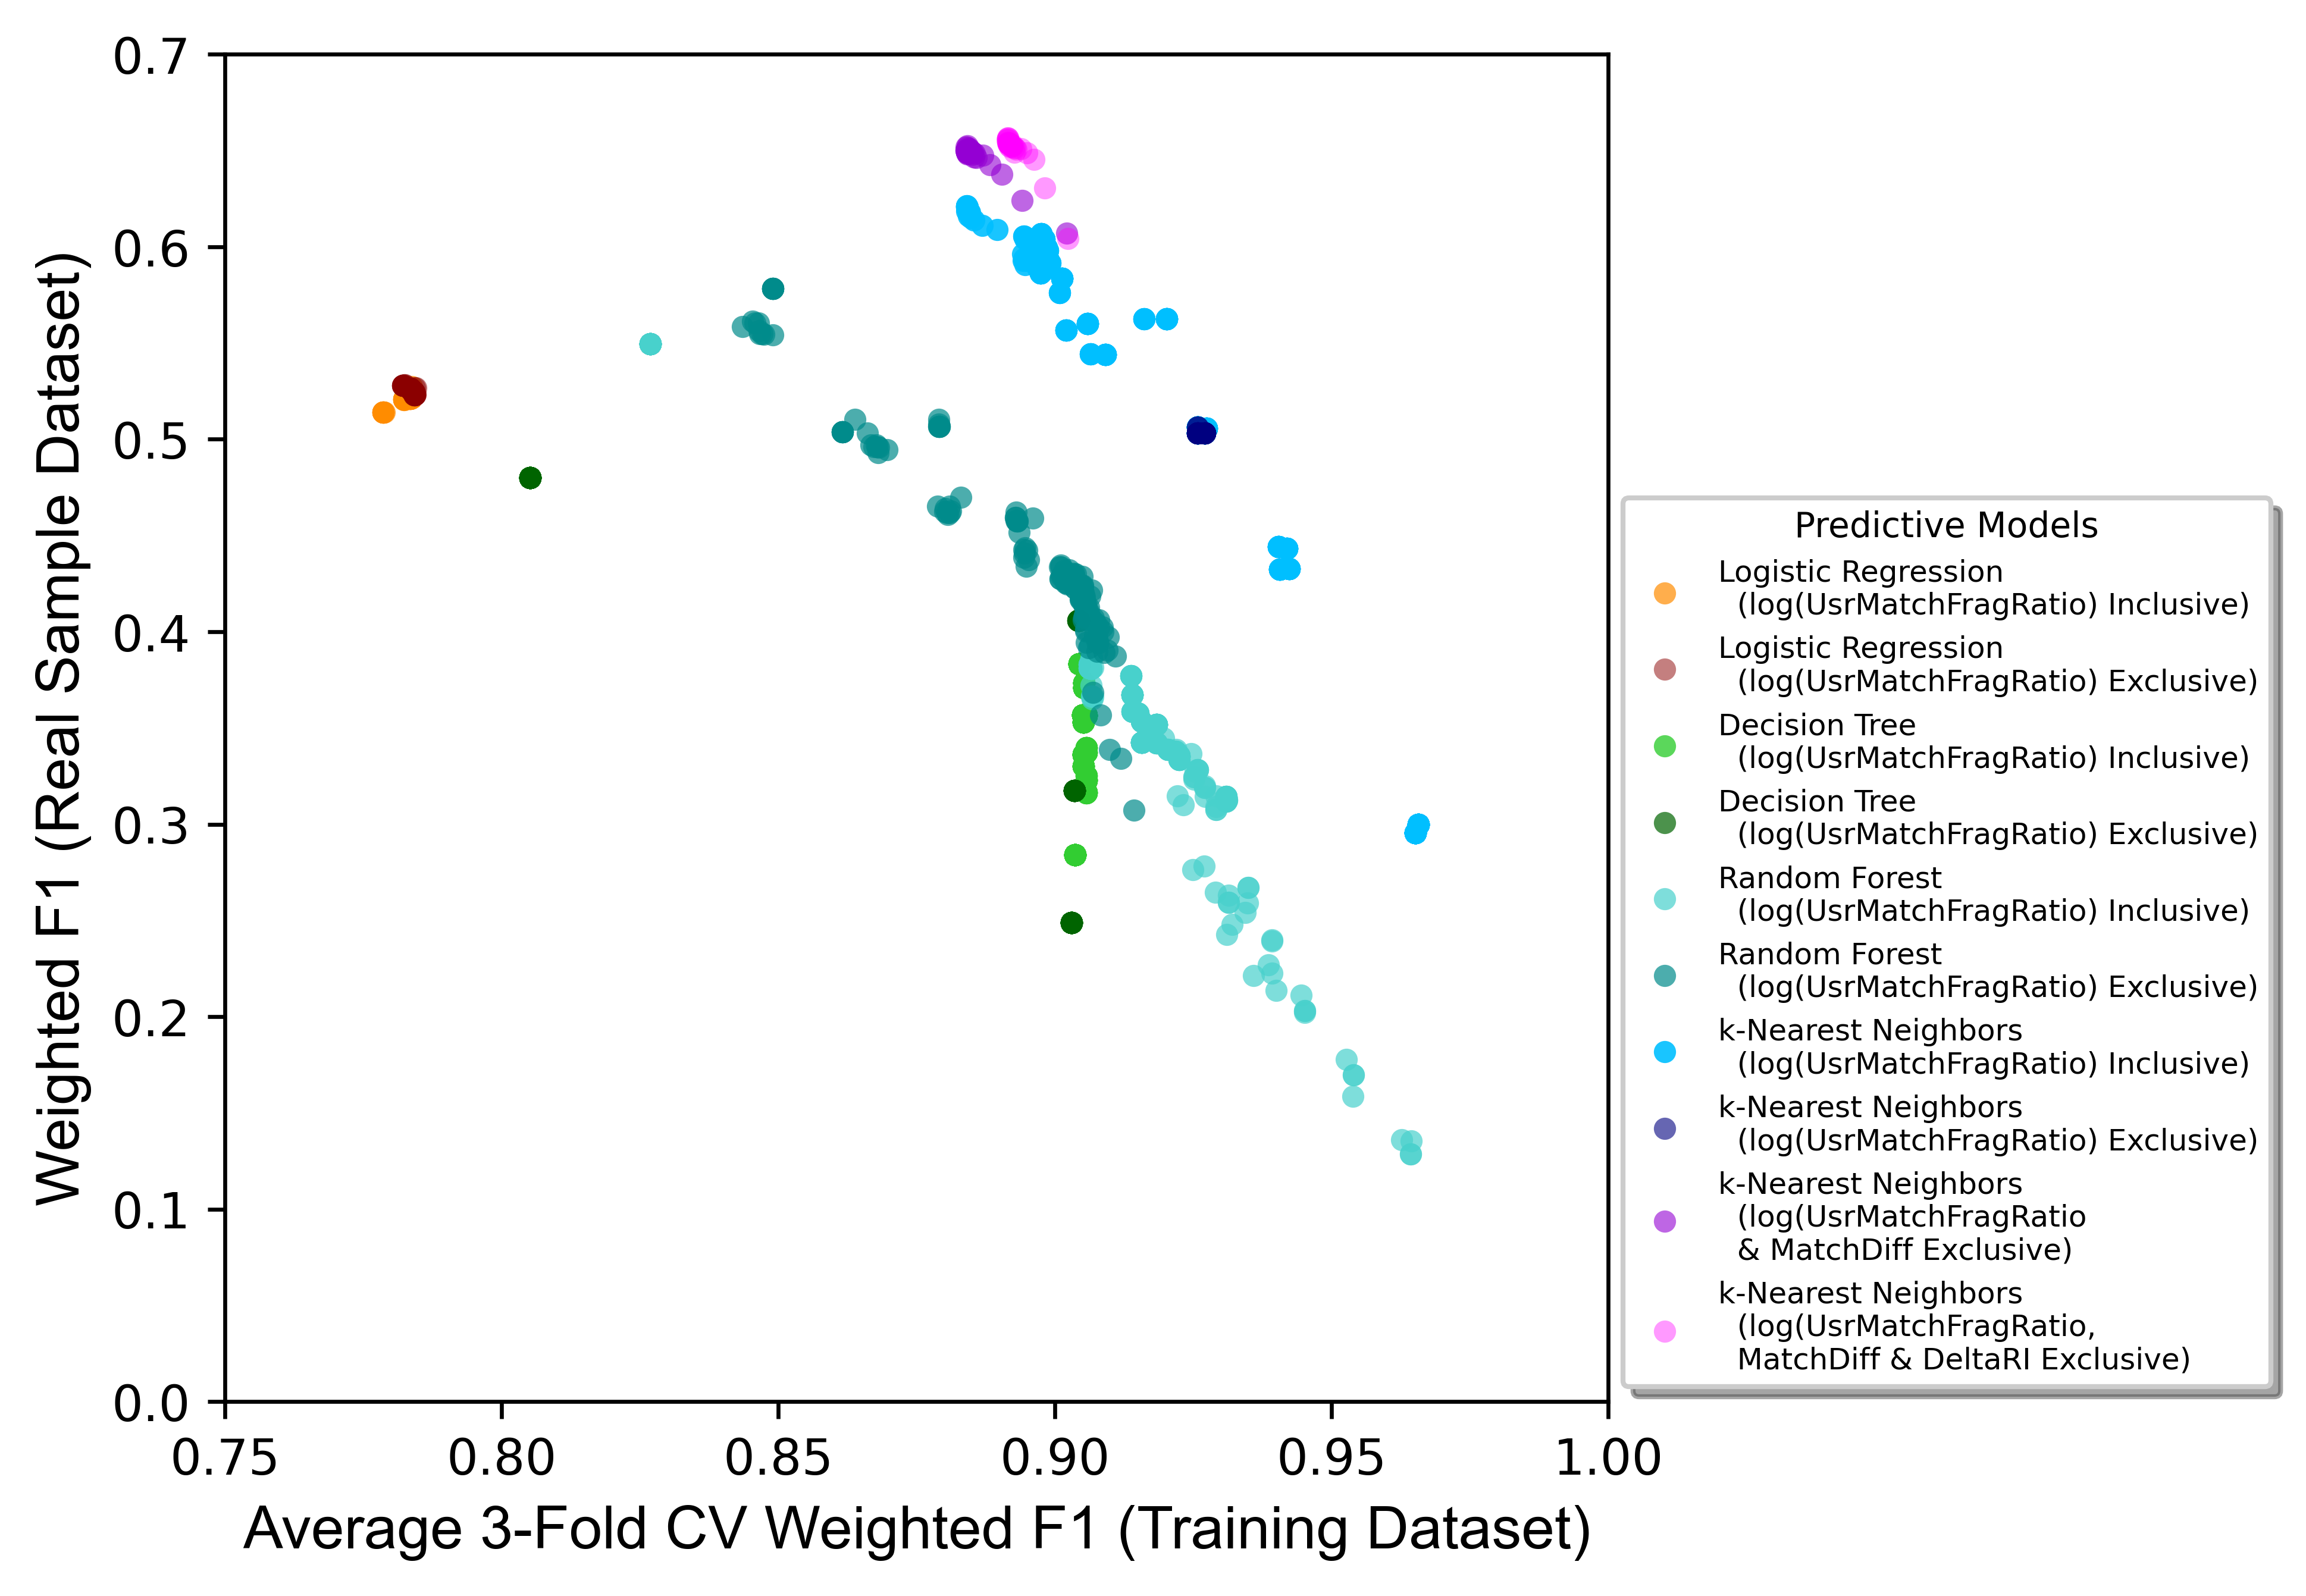

In [159]:
# All 8 parameters models
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 600

x1 = df_tuneLR_8para['f1_3Ftrain']
y1 = df_tuneLR_8para['f1_val']
z1 = df_tuneLR_8para['f1_pest']

x2 = df_tuneDT_8para['f1_3Ftrain']
y2 = df_tuneDT_8para['f1_val']
z2 = df_tuneDT_8para['f1_pest']

x3 = df_tuneRF_8para['f1_3Ftrain']
y3 = df_tuneRF_8para['f1_val']
z3 = df_tuneRF_8para['f1_pest']

x4 = df_tuneKNN_8para['f1_3Ftrain']
y4 = df_tuneKNN_8para['f1_val']
z4 = df_tuneKNN_8para['f1_pest']

a1 = df_tuneLR_7para_noUsrRef['f1_3Ftrain']
b1 = df_tuneLR_7para_noUsrRef['f1_val']
c1 = df_tuneLR_7para_noUsrRef['f1_pest']

a2 = df_tuneDT_7para_noUsrRef['f1_3Ftrain']
b2 = df_tuneDT_7para_noUsrRef['f1_val']
c2 = df_tuneDT_7para_noUsrRef['f1_pest']

a3 = df_tuneRF_7para_noUsrRef['f1_3Ftrain']
b3 = df_tuneRF_7para_noUsrRef['f1_val']
c3 = df_tuneRF_7para_noUsrRef['f1_pest']

a4 = df_tuneKNN_7para_noUsrRef['f1_3Ftrain']
b4 = df_tuneKNN_7para_noUsrRef['f1_val']
c4 = df_tuneKNN_7para_noUsrRef['f1_pest']

d4 = df_tuneKNN_6para_noUsrRef_noMatchDiff['f1_3Ftrain']
e4 = df_tuneKNN_6para_noUsrRef_noMatchDiff['f1_val']
f4 = df_tuneKNN_6para_noUsrRef_noMatchDiff['f1_pest']

i4 = df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI['f1_3Ftrain']
j4 = df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI['f1_val']
k4 = df_tuneKNN_6para_noUsrRef_noMatchDiff_noDeltaRI['f1_pest']

(fig, ax) = plt.subplots()

c_dict1 = {"Logistic Regression (log(UsrMatchFragRatio) Inclusive)": 'darkorange', "Logistic Regression (log(UsrMatchFragRatio) Exclusive)": 'darkred'}
count_start = 0
count_end = 130
ax.scatter(x1[count_start:count_end], z1[count_start:count_end], s=20, label="Logistic Regression \n  (log(UsrMatchFragRatio) Inclusive)", c="darkorange", alpha=0.7, lw=0)
count_start = 0
count_end = 70
ax.scatter(a1[count_start:count_end], c1[count_start:count_end], s=20, label="Logistic Regression \n  (log(UsrMatchFragRatio) Exclusive)", c="darkred", alpha=0.5, lw=0)


c_dict2 = {"Decision Tree (log(UsrMatchFragRatio) Inclusive)": 'limegreen', "Decision Tree (log(UsrMatchFragRatio) Exclusive)": 'darkgreen'}
count_start = 0
count_end = 729
ax.scatter(x2[count_start:count_end], z2[count_start:count_end], s=20, label="Decision Tree \n  (log(UsrMatchFragRatio) Inclusive)", c="limegreen", alpha=0.8, lw=0)
count_start = 0
count_end = 100
ax.scatter(a2[count_start:count_end], c2[count_start:count_end], s=20, label="Decision Tree \n  (log(UsrMatchFragRatio) Exclusive)", c="darkgreen", alpha=0.7, lw=0)


c_dict3 = {"Random Forest (log(UsrMatchFragRatio) Inclusive)": 'mediumturquoise', "Random Forest (log(UsrMatchFragRatio) Exclusive)": 'darkcyan'}
count_start = 0
count_end = 252
ax.scatter(x3[count_start:count_end], z3[count_start:count_end], s=20, label="Random Forest \n  (log(UsrMatchFragRatio) Inclusive)", c="mediumturquoise", alpha=0.7, lw=0)
count_start = 0
count_end = 150
ax.scatter(a3[count_start:count_end], c3[count_start:count_end], s=20, label="Random Forest \n  (log(UsrMatchFragRatio) Exclusive)", c="darkcyan", alpha=0.7, lw=0)


c_dict4 = {"k-Nearest Neighbors (log(UsrMatchFragRatio) Inclusive)": 'deepskyblue', "k-Nearest Neighbors (log(UsrMatchFragRatio) Exclusive)": 'navy'}
count_start = 0
count_end = 371
ax.scatter(x4[count_start:count_end], z4[count_start:count_end], s=20, label="k-Nearest Neighbors \n  (log(UsrMatchFragRatio) Inclusive)", c="deepskyblue", alpha=0.9, lw=0)
count_start = 0
count_end = 26
ax.scatter(x4[count_start:count_end], z4[count_start:count_end], s=20, label="k-Nearest Neighbors \n  (log(UsrMatchFragRatio) Exclusive)", c="navy", alpha=0.6, lw=0)
count_start = 0
count_end = 31
ax.scatter(d4[count_start:count_end], f4[count_start:count_end], s=20, label="k-Nearest Neighbors \n  (log(UsrMatchFragRatio \n  & MatchDiff Exclusive)", c="darkviolet", alpha=0.6, lw=0)
count_start = 0
count_end = 31
ax.scatter(i4[count_start:count_end], k4[count_start:count_end], s=20, label="k-Nearest Neighbors \n  (log(UsrMatchFragRatio, \n  MatchDiff & DeltaRI Exclusive)", c="magenta", alpha=0.4, lw=0)
    
    
plt.xlabel("Average 3-Fold CV Weighted F1 (Training Dataset)", fontproperties='Arial', fontsize=12)
plt.ylabel("Weighted F1 (Real Sample Dataset)", fontproperties='Arial', fontsize=12)

plt.xlim(0.75, 1.00)
plt.ylim(0, 0.70)

ax.legend(loc="lower left", title="Predictive Models", title_fontsize=7, fontsize=6, 
          bbox_to_anchor=(1, 0), ncol=1, fancybox=True, shadow=True)

#plt.show()
plt.savefig(r"F:\UvA\F\UvA\app\updated4pest_8paraVS7para.jpg", bbox_inches='tight')
#plt.close()